Quantitative Analysis (per Region)

Run this file in the python environment

__________________________________________________

Import the csv datafile here.

In the file explorer right click the dataset and copy path, then paste between the "..."

Any backslashes should be replaced by double backslash.

Make sure that the csv file is seperated by commas.

In [16]:
import pandas as pd

ais = pd.read_csv("Dataset.csv",sep=",") # Paste the datafile here
ais.head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_8684\11124247.py:3: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ais = pd.read_csv("Dataset.csv",sep=",") # Paste the datafile here


,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,ETA,A,B,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,0.0,12.5,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,NaN,NaN,...,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2023-10-28 07:17:52.488,BSADS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,STX564855481005,71220.0,V,0.0,I
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,0.0,11.3,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2023-10-28 07:17:53.519,PSTXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,INFO,2.0,0,0.0,1


The columns needed for this analysis are: "Region" from maidenhead library, "Timestamp" and a quantitative variable (here I use "Draught")

Check the number of rows were loaded in the dataset.

In [17]:
ais.shape

(6599735, 34)

Check if the columns are of the right datatype

In [18]:
ais.dtypes

Timestamp              object
Packet Type            object
Channel                object
Message Type          float64
MMSI                   object
Navigation Status      object
Repeat Indicator      float64
IMO                   float64
ROT                   float64
SOG                    object
COG                   float64
Position Accuracy      object
Longitude             float64
Latitude              float64
Region                 object
Vessel name            object
Ship type              object
True Heading          float64
Radio status          float64
Destination           float64
Maneuver Indicator     object
Draught               float64
Position fix type      object
Call sign              object
ETA                    object
A                     float64
B                     float64
C                     float64
D                     float64
Prop message 1         object
Prop message 2        float64
Prop message 3         object
Prop message 4        float64
Prop messa

Subset the dataset for just one specific region

In [25]:
#Check for unique values for the region
print(ais['Region'].unique())

['QH69' nan 'QH58' 'QH68' 'QH59' 'QI60' 'QI61' 'QH57' 'QI70' 'QI50' 'QI51'
 'QI25' 'QI23' 'QH49' 'TH49' 'RM89' 'QH79' 'QH48' 'QI42' 'QH78' 'QH56'
 'QI40' 'TH48' 'OI81']


In [26]:
ais_subset = ais[ais["Region"]=='QH69']

In [27]:
ais_subset.head()

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,ETA,A,B,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,0.0,12.5,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,NaN,NaN,...,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,0.0,11.3,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,2023-10-28 07:18:00.457,BSVDM,B,1.0,353246000,Underway using engine,0.0,0.0,0.0,12.5,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,2023-10-28 07:18:01.242,BSVDO,B,4.0,2579991,NaN,0.0,0.0,NaN,NaN,...,2023-10-28 07:12:29,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Create a histogram of the quantitative variable you are interested in. Ensure that that corlumn in numerical.

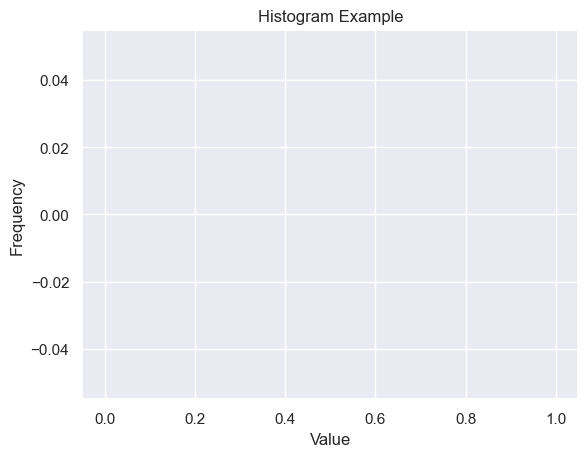

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exchange 'Draught' with any other column name
ais_subset = ais_subset.dropna(subset='Draught') # Remove 'NaN' values
ais_subset = ais_subset[ais_subset['Draught'] != 0.0] #Remove zero values

#Create histogram
sns.set_theme(style="darkgrid")
sns.histplot(data=ais_subset, x="Draught", kde=True)

# Change title, x labepl, y label of the histogram
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Get statistics of the variable

In [21]:
print(f"Mean: {ais_subset['Draught'].mean()}")
print(f"Standard deviation: {ais_subset['Draught'].std()}")
print(f"Minimum: {ais_subset['Draught'].min()}")
print(f"Maximum: {ais_subset['Draught'].max()}")

Mean: nan
Standard deviation: nan
Minimum: nan
Maximum: nan


Find frequency of AIS messages over time.

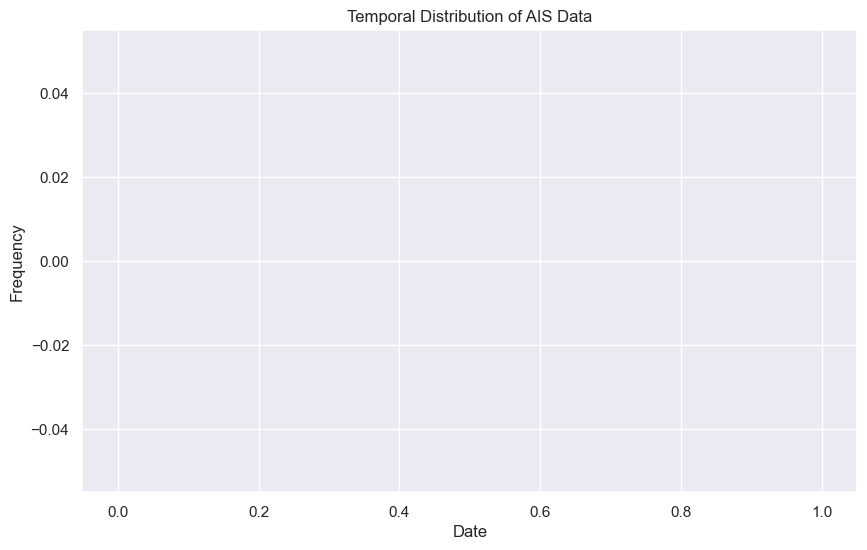

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(ais_subset['Timestamp'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Temporal Distribution of AIS Data')
plt.show()